
# 📊 M5.4 箱型圖與異常值檢測

本課程介紹如何使用箱型圖進行數據分布分析和異常值檢測。我們將學習如何創建有效的箱型圖，理解其統計含義，並使用多種方法來識別和處理異常值。這些技能在數據清理和探索性數據分析中非常重要。


## 🎯 教學目標

- 📦 掌握箱型圖的創建和解釋方法
- 🔍 學習異常值檢測的多種技術
- 🎨 探索進階的箱型圖定制方法
- 💡 理解如何處理和報告異常值

In [7]:
# 環境設置
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# 忽略警告
warnings.filterwarnings('ignore')

# 設置中文字體
try:
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'Arial Unicode MS']
    plt.rcParams['axes.unicode_minus'] = False
except:
    pass

# 設置顯示選項
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 120)

# 設置繪圖風格
plt.style.use('seaborn-v0_8-whitegrid')

In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# # 設置可視化風格
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# 微軟正黑體或思源黑體路徑 (請依你電腦為準)
font_path = "C:/Windows/Fonts/msjh.ttc"  # 或 simsun.ttc, NotoSansCJK, 等

# 建立 FontProperties
font_prop = fm.FontProperties(fname=font_path)

# 設定 matplotlib 全域字型（包括標題、座標軸、legend）
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 避免負號亂碼

# 設置顯示選項
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', 100)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)


## 1. 生成示例數據

In [9]:
def generate_sample_data(n_samples=1000):
    """生成包含異常值的示例數據"""
    np.random.seed(42)
    
    # 生成正常分布數據
    normal_data = np.random.normal(1000, 200, n_samples)
    
    # 添加一些異常值
    outliers = np.random.uniform(2000, 3000, int(n_samples * 0.05))  # 5%的異常值
    
    # 合併數據
    data = np.concatenate([normal_data, outliers])
    
    # 創建DataFrame
    df = pd.DataFrame({
        '銷售額': data,
        '地區': np.random.choice(['北部', '中部', '南部', '東部'], len(data)),
        '產品類別': np.random.choice(['A', 'B', 'C'], len(data)),
        '客戶評分': np.random.normal(4, 0.5, len(data))
    })
    
    return df

# 生成數據
data = generate_sample_data()


## 2. 基本箱型圖

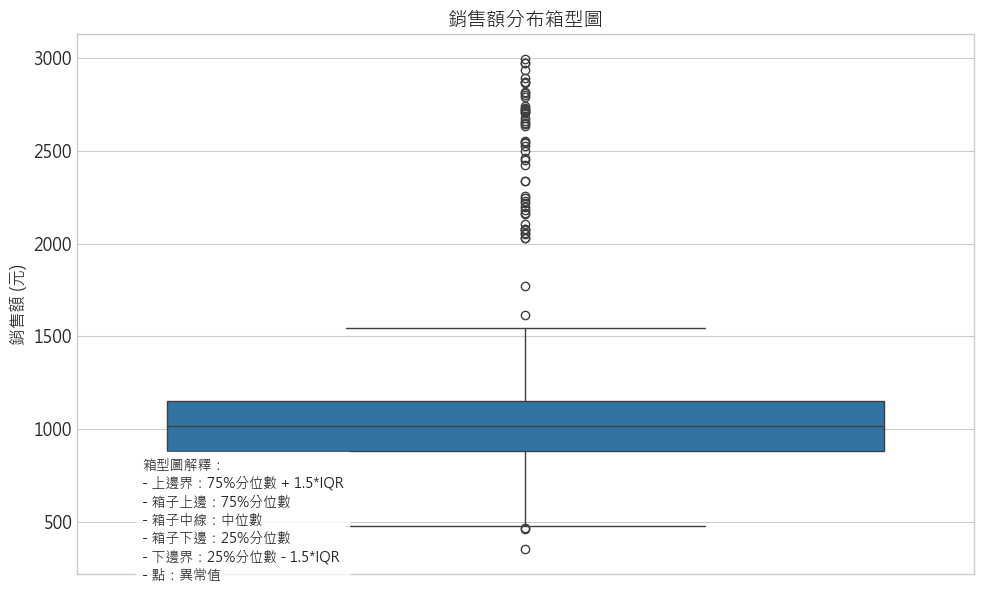

In [10]:
def basic_boxplot():
    """創建基本的箱型圖"""
    plt.figure(figsize=(10, 6))
    
    # 創建箱型圖
    sns.boxplot(y=data['銷售額'])
    
    plt.title('銷售額分布箱型圖', fontsize=14)
    plt.ylabel('銷售額 (元)', fontsize=12)
    
    # 添加說明文字
    plt.figtext(0.15, 0.02, 
                '箱型圖解釋：\n'
                '- 上邊界：75%分位數 + 1.5*IQR\n'
                '- 箱子上邊：75%分位數\n'
                '- 箱子中線：中位數\n'
                '- 箱子下邊：25%分位數\n'
                '- 下邊界：25%分位數 - 1.5*IQR\n'
                '- 點：異常值',
                fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

basic_boxplot()


## 3. 分組箱型圖

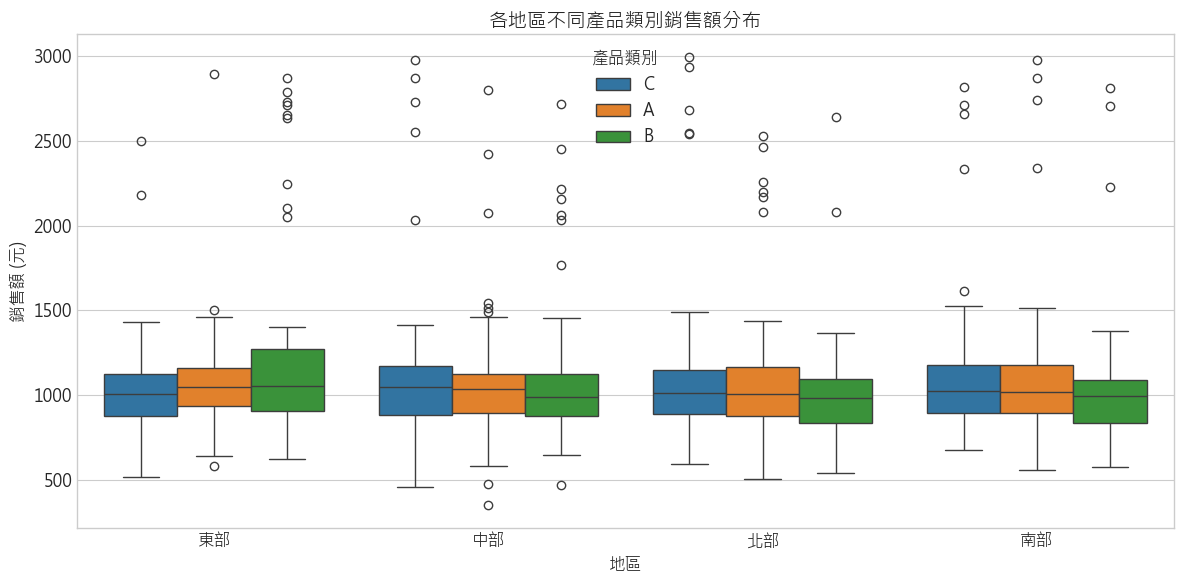

In [11]:
def grouped_boxplot():
    """創建分組箱型圖"""
    plt.figure(figsize=(12, 6))
    
    # 創建分組箱型圖
    sns.boxplot(x='地區', y='銷售額', hue='產品類別', data=data)
    
    plt.title('各地區不同產品類別銷售額分布', fontsize=14)
    plt.xlabel('地區', fontsize=12)
    plt.ylabel('銷售額 (元)', fontsize=12)
    
    plt.legend(title='產品類別')
    plt.xticks(rotation=0)
    
    plt.tight_layout()
    plt.show()

grouped_boxplot()


## 4. 異常值檢測

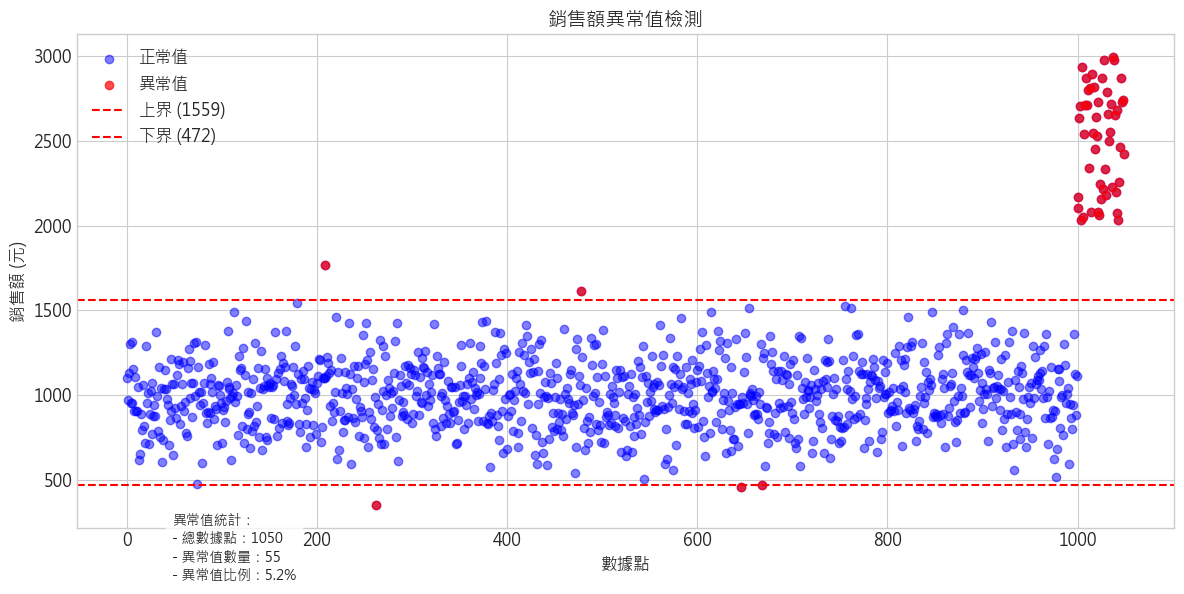

In [12]:
def detect_outliers(data, column):
    """使用IQR方法檢測異常值"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def visualize_outliers():
    """視覺化異常值檢測結果"""
    outliers, lower_bound, upper_bound = detect_outliers(data, '銷售額')
    
    plt.figure(figsize=(12, 6))
    
    # 繪製散點圖
    plt.scatter(range(len(data)), data['銷售額'], 
                alpha=0.5, label='正常值', color='blue')
    plt.scatter(outliers.index, outliers['銷售額'], 
                color='red', label='異常值', alpha=0.7)
    
    # 添加邊界線
    plt.axhline(y=upper_bound, color='r', linestyle='--', 
                label=f'上界 ({upper_bound:.0f})')
    plt.axhline(y=lower_bound, color='r', linestyle='--', 
                label=f'下界 ({lower_bound:.0f})')
    
    plt.title('銷售額異常值檢測', fontsize=14)
    plt.xlabel('數據點', fontsize=12)
    plt.ylabel('銷售額 (元)', fontsize=12)
    plt.legend()
    
    # 添加統計信息
    outlier_percent = len(outliers) / len(data) * 100
    plt.figtext(0.15, 0.02, 
                f'異常值統計：\n'
                f'- 總數據點：{len(data)}\n'
                f'- 異常值數量：{len(outliers)}\n'
                f'- 異常值比例：{outlier_percent:.1f}%',
                fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

visualize_outliers()


## 5. 進階異常值分析

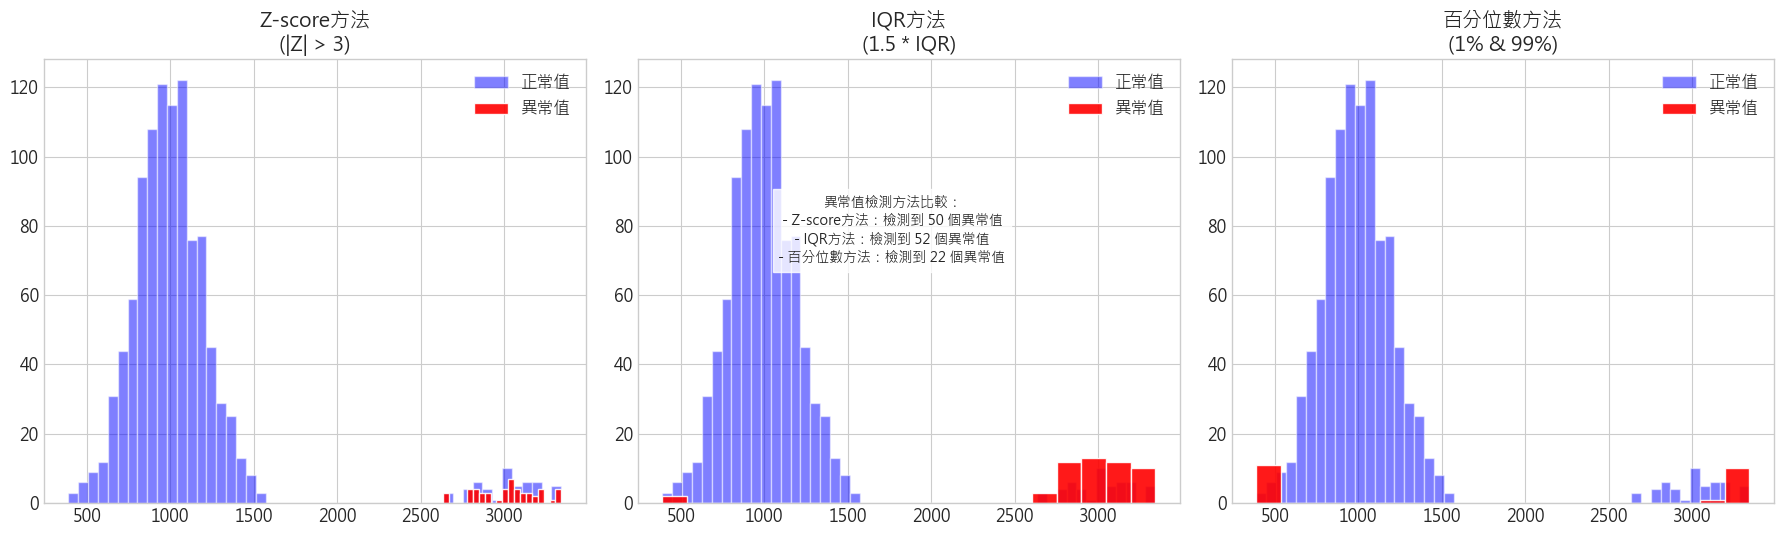

In [ ]:
# 假設 data 是你的 DataFrame
np.random.seed(0)
data = pd.DataFrame({
    '銷售額': np.random.normal(1000, 200, 1000).tolist() + np.random.normal(3000, 200, 50).tolist()
})

def detect_outliers(data, column):
    """使用IQR方法檢測異常值"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def advanced_outlier_analysis():
    """進行進階異常值分析"""
    # 使用多種方法檢測異常值
    
    # 1. Z-score方法
    z_scores = np.abs(stats.zscore(data['銷售額']))
    z_score_outliers = data[z_scores > 3]
    
    # 2. IQR方法
    iqr_outliers, _, _ = detect_outliers(data, '銷售額')
    
    # 3. 百分位數方法
    percentile_outliers = data[(data['銷售額'] < data['銷售額'].quantile(0.01)) |
                              (data['銷售額'] > data['銷售額'].quantile(0.99))]
    
    # 創建比較圖
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Z-score方法
    axes[0].hist(data['銷售額'], bins=50, alpha=0.5, color='blue', label='正常值')
    axes[0].hist(z_score_outliers['銷售額'], bins=20, alpha=0.9, color='red', label='異常值')
    axes[0].set_title('Z-score方法\n(|Z| > 3)')
    axes[0].legend()
    
    # IQR方法
    axes[1].hist(data['銷售額'], bins=50, alpha=0.5, color='blue', label='正常值')
    axes[1].hist(iqr_outliers['銷售額'], bins=20, alpha=0.9, color='red', label='異常值')
    axes[1].set_title('IQR方法\n(1.5 * IQR)')
    axes[1].legend()
    
    # 百分位數方法
    axes[2].hist(data['銷售額'], bins=50, alpha=0.5, color='blue', label='正常值')
    axes[2].hist(percentile_outliers['銷售額'], bins=20, alpha=0.9, color='red', label='異常值')
    axes[2].set_title('百分位數方法\n(1% & 99%)')
    axes[2].legend()
    
    # 添加方法比較說明
    plt.figtext(0.5, 0.5,
                f'異常值檢測方法比較：\n'
                f'- Z-score方法：檢測到 {len(z_score_outliers)} 個異常值\n'
                f'- IQR方法：檢測到 {len(iqr_outliers)} 個異常值\n'
                f'- 百分位數方法：檢測到 {len(percentile_outliers)} 個異常值',
                fontsize=10, bbox=dict(facecolor='white', alpha=0.8), ha='center')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

advanced_outlier_analysis()


## 6. 異常值處理策略

在處理異常值時，我們需要考慮以下幾個方面：

1. **識別異常值的原因**
   - 數據輸入錯誤
   - 測量錯誤
   - 自然變異
   - 特殊事件

2. **處理方法選擇**
   - 保留：如果異常值有合理解釋
   - 刪除：如果確定是錯誤數據
   - 修正：如果可以追溯到正確值
   - 替換：使用統計方法估算

3. **處理策略的影響**
   - 考慮對統計分析的影響
   - 評估對模型效果的影響
   - 記錄處理決策和原因


## 7. 總結

本課程介紹了箱型圖與異常值分析的主要內容：

- **箱型圖解讀**：理解四分位數、異常值範圍等統計概念
- **異常值檢測**：掌握多種檢測方法及其適用場景
- **分組分析**：學習如何進行分組比較和可視化
- **處理策略**：瞭解異常值處理的各種方法和注意事項

這些技能對於數據預處理和探索性數據分析非常重要，能幫助我們更好地理解數據特徵和潛在問題。